# EDA

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')


In [2]:
df = pd.read_csv('2015-2018_Happiness_Data')

In [3]:
df

,Unnamed: 0,Country,Rank,Happiness_Score,GDP_per_Capita,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
0,0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...
621,151,Yemen,152,3.355,0.44200,0.34300,0.24400,0.06400,0.08300,2018
622,152,Tanzania,153,3.303,0.45500,0.38100,0.48100,0.09700,0.27000,2018
623,153,South Sudan,154,3.254,0.33700,0.17700,0.11200,0.10600,0.22400,2018
624,154,Central African Republic,155,3.083,0.02400,0.01000,0.30500,0.03800,0.21800,2018


In [4]:
del df['Unnamed: 0']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 9 columns):
Country                  626 non-null object
Rank                     626 non-null int64
Happiness_Score          626 non-null float64
GDP_per_Capita           626 non-null float64
Life_Expectancy          626 non-null float64
Freedom                  626 non-null float64
Government_Corruption    626 non-null float64
Generosity               626 non-null float64
Year                     626 non-null int64
dtypes: float64(6), int64(2), object(1)
memory usage: 44.1+ KB


In [6]:
df.columns

Index(['Country', 'Rank', 'Happiness_Score', 'GDP_per_Capita',
       'Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity',
       'Year'],
      dtype='object')

We will look at the distribution of each variable to check for normality.

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


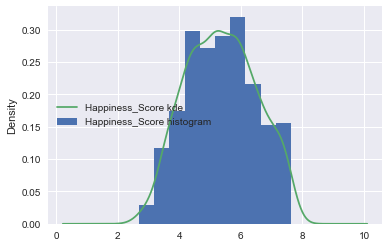

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


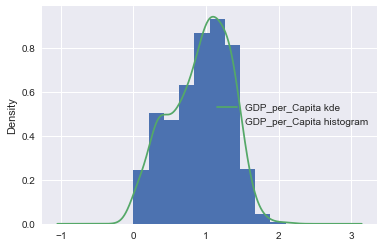

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


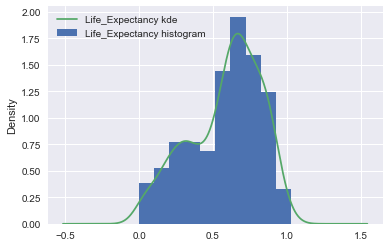

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


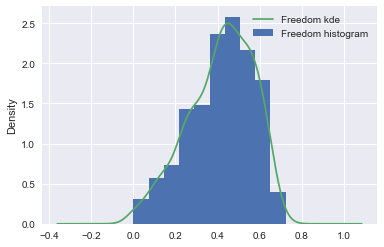

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


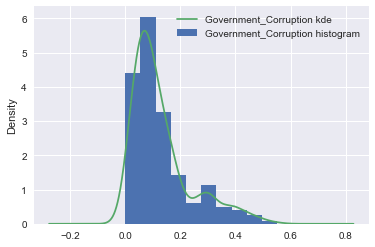

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


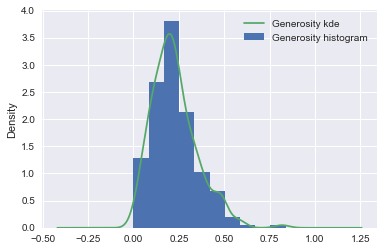

In [7]:
for column in df[['Happiness_Score', 'GDP_per_Capita',
       'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity']]:
    df[column].plot.hist(normed=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()


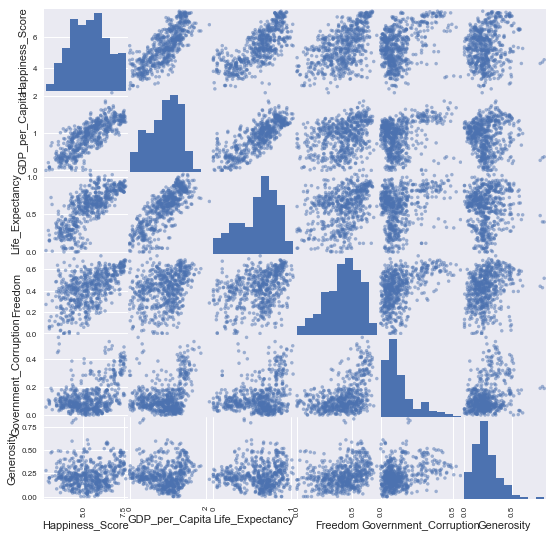

In [8]:
pd.plotting.scatter_matrix(df[['Happiness_Score', 'GDP_per_Capita',
       'Life_Expectancy', 'Freedom', 'Government_Corruption',
       'Generosity']], figsize=[9, 9]);


In [9]:
corr = df.corr()
corr

,Rank,Happiness_Score,GDP_per_Capita,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
Rank,1.000000,-0.992879,-0.792912,-0.756822,-0.537636,-0.378060,-0.132934,-0.009822
Happiness_Score,-0.992879,1.000000,0.788303,0.754389,0.550175,0.402838,0.153054,-0.002727
GDP_per_Capita,-0.792912,0.788303,1.000000,0.802116,0.329189,0.302797,-0.005749,0.045916
Life_Expectancy,-0.756822,0.754389,0.802116,1.000000,0.357267,0.268741,0.056900,-0.048989
Freedom,-0.537636,0.550175,0.329189,0.357267,1.000000,0.461249,0.289032,0.082895
Government_Corruption,-0.378060,0.402838,0.302797,0.268741,0.461249,1.000000,0.311111,-0.113001
Generosity,-0.132934,0.153054,-0.005749,0.056900,0.289032,0.311111,1.000000,-0.145271
Year,-0.009822,-0.002727,0.045916,-0.048989,0.082895,-0.113001,-0.145271,1.000000


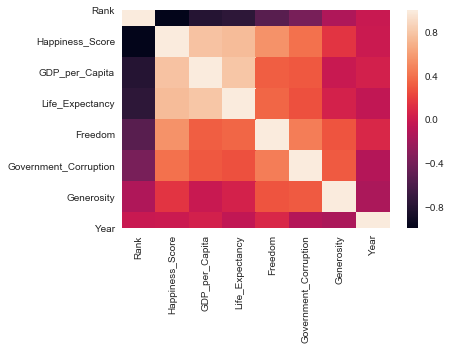

In [10]:
sns.heatmap(corr)


GDP per Capita and Life Expectancy are correlated > 0.8, evidencing multicollinearity, therefore we will need to drop one of these features. 

In [11]:
del df['Life_Expectancy']

The Corruption rating is non-normal, so we will take the log() of the feature. Because there are some ratings of 0, the log(0) creates values of infinity in our dataset in the Trust (Government Corruption) column. We replace these with 0, considering that the original score is 0.

In [12]:
df['Government_Corruption'] = df['Government_Corruption'].map(lambda x: np.log(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [13]:
df.replace([np.inf, -np.inf], 0, inplace=True)

# Multiple Linear Regression

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [15]:
formula = "Happiness_Score ~ GDP_per_Capita+Freedom+Government_Corruption+Generosity"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     405.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          1.44e-171
Time:                        16:48:57   Log-Likelihood:                -563.24
No. Observations:                 626   AIC:                             1136.
Df Residuals:                     621   BIC:                             1159.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.8016      0.128     21.908      0.000       2.550       3.053
GDP_per_Capita            1.8937      0.062     30.426      0.000       1.771       2.016
Freedom                   2.1072      0.177     11.879      0.000       1.759       2.456
Government_Corruption     0.0689      0.028      2.435      0.015       0.013       0.125
Generosity                0.5175      0.202      2.558      0.011       0.120       0.915
==============================================================================
Omnibus:                       10.791   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.860
Skew:                          -0.302   Prob(JB):                      0.00438
Kurtosis:                       3.228   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model shows that all of our predictors are statistically significant with p-values < 0.05. An r-squared of 0.723 tells us that 72.3% of the variability in happiness score is explained by GDP per Capita, Freedom, Government Corruption, and Generosity.

In [19]:
y = df[['Happiness_Score']]
X = df.drop(['Happiness_Score', 'Country', 'Year', 'Rank'], axis=1)

In [20]:
# Regression model validation:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test



In [21]:
print(len(X_train), len(X_test))

500 126


In [23]:
# sns.scatterplot(X_test, y_test)

In [24]:
from sklearn.metrics import mean_squared_error


In [25]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 0.3427346031219499
Test Mean Squarred Error: 0.40183497801643314


Cross-validation testing:

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [30]:
cv_10_results

-0.3860492477061824

# Stepwise Selection

In [32]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [34]:
result = stepwise_selection(X, df['Happiness_Score'], verbose=True)
print('resulting features:')
print(result)

Add  GDP_per_Capita                 with p-value 9.80971e-134
Add  Freedom                        with p-value 6.75513e-41
Add  Generosity                     with p-value 0.00194687
resulting features:
['GDP_per_Capita', 'Freedom', 'Generosity']


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


A step-wise selection method resulted in Corruption being excluded from our model. We then reran our model.

In [35]:
formula = "Happiness_Score ~ GDP_per_Capita+Freedom+Generosity"
model = ols(formula= formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     534.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          1.09e-171
Time:                        16:56:51   Log-Likelihood:                -566.21
No. Observations:                 626   AIC:                             1140.
Df Residuals:                     622   BIC:                             1158.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5626      0.082     31.132      0.000       2.401       2.724
GDP_per_Capita     1.9024      0.062     30.494      0.000       1.780       2.025
Freedom            2.2160      0.172     12.857      0.000       1.878       2.555
Generosity         0.6185      0.199      3.111      0.002       0.228       1.009
==============================================================================
Omnibus:                        8.474   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.391
Skew:                          -0.272   Prob(JB):                       0.0151
Kurtosis:                       3.163   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y2 = df[['Happiness_Score']]
X2 = df.drop(['Happiness_Score', 'Country', 'Year', 'Rank', 'Government_Corruption'], axis=1)

In [37]:
# Regression model validation:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [38]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)


Train Mean Squarred Error: 0.3452393447456732
Test Mean Squarred Error: 0.40815449868873427


In [50]:
rmse = np.sqrt(test_mse/len(X_test))
rmse

0.05691503683706581

Our MSE was not improved by a model excluding Corruption.

In [40]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [41]:
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [42]:
# Build a Ridge, Lasso and regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)

lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (500, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (126, 1))

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [45]:
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))

Train Error Ridge Model Happiness_Score    172.807593
dtype: float64
Test Error Ridge Model Happiness_Score    51.572116
dtype: float64


Train Error Lasso Model Happiness_Score    655.429415
dtype: float64
Test Error Lasso Model Happiness_Score    145.385994
dtype: float64


Train Error Unpenalized Linear Model Happiness_Score    172.619672
dtype: float64
Test Error Unpenalized Linear Model Happiness_Score    51.427467
dtype: float64


Our model was not improved by utilizing the Ridge or Lasso methods given that the least error results from the Unpenalized Linear Model.